In [36]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf


final_ma_data = pd.read_csv('/Users/avanthpakanati/Desktop/ECON:HLTH Research Seminar /Homework4/data/Output/final_ma_data.csv')

/var/folders/2q/wzjp_2kd355b8clhzqwmytb40000gn/T/ipykernel_86398/1280282546.py:7: DtypeWarning: Columns (68,98,99,100,101,102,103,104,105,106) have mixed types. Specify dtype option on import or set low_memory=False.
  final_ma_data = pd.read_csv('/Users/avanthpakanati/Desktop/ECON:HLTH Research Seminar /Homework4/data/Output/final_ma_data.csv')


<Figure size 1200x600 with 0 Axes>

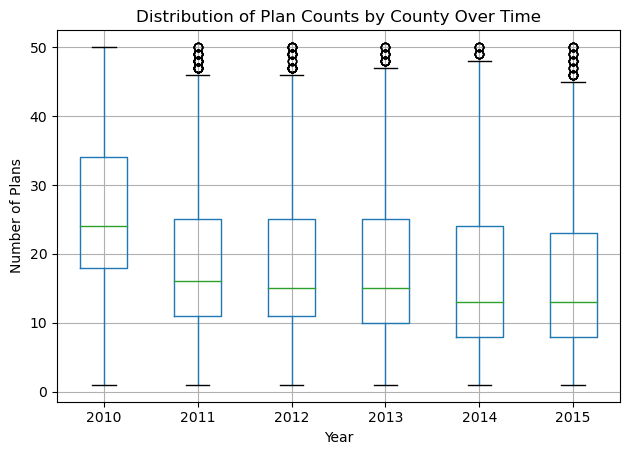

In [3]:
#QUESTION 1 
final_ma_data.columns = final_ma_data.columns.str.lower()
# Remove SNPs and removing 800-series plans
final_ma_data = final_ma_data[final_ma_data['snp'] != 'Yes']


final_ma_data = final_ma_data[~final_ma_data['planid'].astype(str).str.startswith('800')]

# Remove prescription drug-only plans (PDPs)
final_ma_data = final_ma_data[~final_ma_data['plan_type'].str.contains('PDP', na=False)]

# Group by year and county to count number of plans
plan_counts = (
    final_ma_data.groupby(['year', 'county'])
    .size()
    .reset_index(name='plan_count')
)
plan_counts = plan_counts[plan_counts['plan_count'] <= 50]


#  box and whisker plot of plan counts by year
plt.figure(figsize=(12, 6))
plan_counts.boxplot(column='plan_count', by='year')
plt.title('Distribution of Plan Counts by County Over Time')
plt.suptitle('')
plt.xlabel('Year')
plt.ylabel('Number of Plans')
plt.grid(True)
plt.tight_layout()
plt.show()

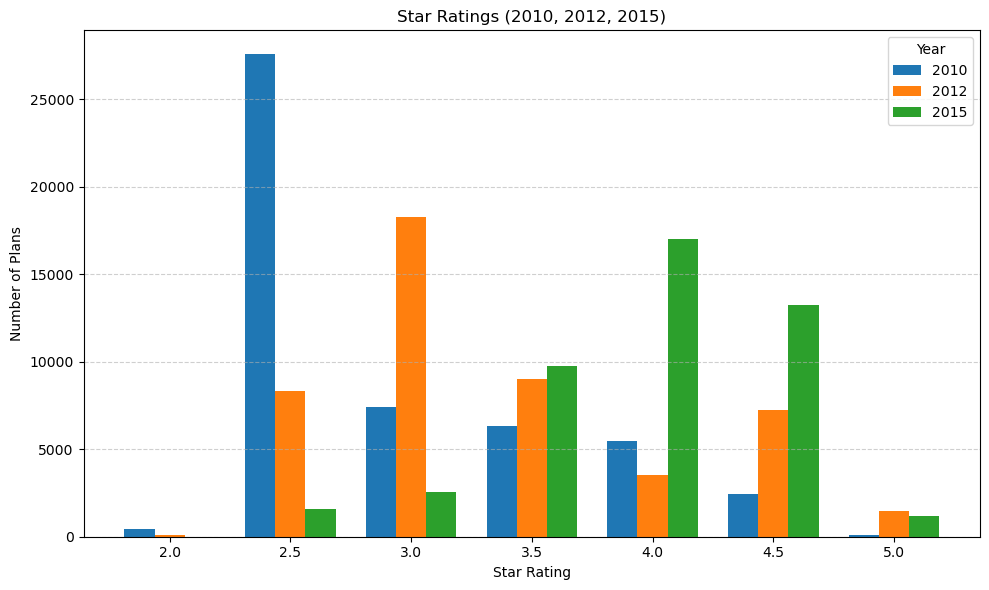

In [14]:
final_ma_data_2 = final_ma_data.copy()

final_ma_data_filtered = final_ma_data_2[final_ma_data_2['year'].isin([2010, 2012, 2015])]

star_counts = (
    final_ma_data_filtered.groupby(['star_rating', 'year'])
    .size()
    .unstack(fill_value=0)
    .sort_index()
)



star_ratings = sorted(star_counts.index)

x = np.arange(len(star_ratings))  
width = 0.25  

#plotting
plt.figure(figsize=(10, 6))

plt.bar(x - width, star_counts[2010], width=width, label='2010')
plt.bar(x,         star_counts[2012], width=width, label='2012')
plt.bar(x + width, star_counts[2015], width=width, label='2015')

plt.xticks(x, star_ratings) 
plt.xlabel('Star Rating')
plt.ylabel('Number of Plans')
plt.title('Star Ratings (2010, 2012, 2015)')
plt.legend(title='Year')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


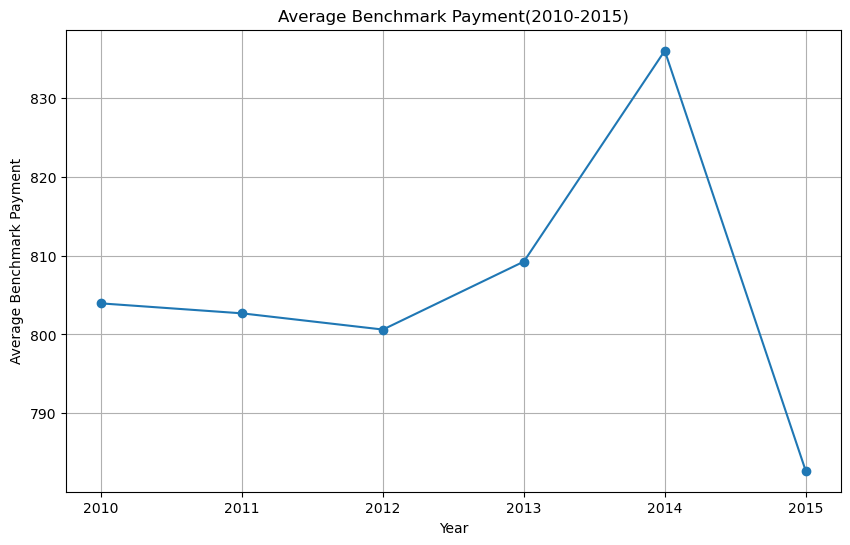

-21.236870591187085


In [47]:

#QUESTION 3 
avg_benchmark_pay = final_ma_data.groupby('year')['ma_rate'].mean().reset_index()

#ploting average benchmark payment 2010-2015
plt.figure(figsize=(10, 6))
plt.plot(avg_benchmark_pay['year'], avg_benchmark_pay['ma_rate'], marker='o')
plt.title('Average Benchmark Payment(2010-2015)')
plt.xlabel('Year')
plt.ylabel('Average Benchmark Payment')
plt.grid(True)
plt.show()

#Calculating the rise in average benchmark payment from 2010 to 2015
benchmark_2010 = avg_benchmark_pay[avg_benchmark_pay['year'] == 2010]['ma_rate'].values[0]
benchmark_2015 = avg_benchmark_pay[avg_benchmark_pay['year'] == 2015]['ma_rate'].values[0]
rise = benchmark_2015 - benchmark_2010

print(rise)



Index(['year', 'ma_share'], dtype='object')


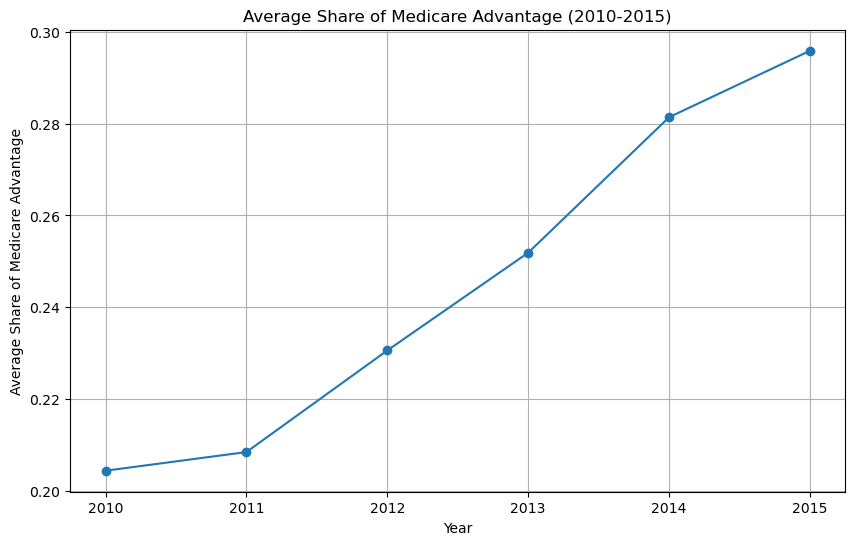

In [50]:
#QUESTION 4 

final_ma_data_copy = final_ma_data.copy()
final_ma_data_copy['ma_share'] = final_ma_data_copy['avg_enrolled'] / final_ma_data_copy['avg_eligibles']
final_ma_data_copy = final_ma_data_copy.groupby('year')['ma_share'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(final_ma_data_copy['year'], final_ma_data_copy['ma_share'], marker='o')
plt.title('Average Share of Medicare Advantage (2010-2015)')
plt.xlabel('Year')
plt.ylabel('Average Share of Medicare Advantage')
plt.grid(True)
plt.show()



In [26]:
#Question 5
final_data_2 = final_ma_data.copy() 

final_2010 = final_data_2[final_data_2['year'] == 2010]

rating_variables = [
    "breastcancer_screen", "rectalcancer_screen", "cv_cholscreen", "diabetes_cholscreen",
    "glaucoma_test", "monitoring", "flu_vaccine", "pn_vaccine", "physical_health",
    "mental_health", "osteo_test", "physical_monitor", "primaryaccess",
    "hospital_followup", "depression_followup", "nodelays", "carequickly",
    "overallrating_care", "overallrating_plan", "calltime",
    "doctor_communicate", "customer_service", "osteo_manage",
    "diabetes_eye", "diabetes_kidney", "diabetes_bloodsugar",
    "diabetes_chol", "antidepressant", "bloodpressure", "ra_manage",
    "copd_test", "betablocker", "bladder", "falling", "appeals_timely", "appeals_review"
]

final_2010["raw_rating"] = final_2010[rating_variables].mean(axis=1, skipna=True)

columns = [
    "contractid", "planid", "fips", "avg_enrollment", "state", "county", "raw_rating",
    "partc_score", "avg_eligibles", "avg_enrolled",  "risk_ab",
    "Star_Rating",  "ma_rate", "plan_type", "partd"
]

final_2010 = final_2010[columns]

final_2010 = final_2010[final_2010["plan_type"] == "HMO/HMOPOS"]

final_2010["rounded_30"] = np.where(
    (final_2010["raw_rating"] >= 2.75) & 
    (final_2010["raw_rating"] < 3.00) & 
    (final_2010["Star_Rating"] == 3.0), 1, 0)

final_2010["rounded_35"] = np.where(
    (final_2010["raw_rating"] >= 3.25) & 
    (final_2010["raw_rating"] < 3.50) & 
    (final_2010["Star_Rating"] == 3.5), 1, 0)

final_2010["rounded_40"] = np.where(
    (final_2010["raw_rating"] >= 3.75) & 
    (final_2010["raw_rating"] < 4.00) & 
    (final_2010["Star_Rating"] == 4.0), 1, 0)

final_2010["rounded_45"] = np.where(
    (final_2010["raw_rating"] >= 4.25) & 
    (final_2010["raw_rating"] < 4.50) & 
    (final_2010["Star_Rating"] == 4.5), 1, 0)

final_2010["rounded_50"] = np.where(
    (final_2010["raw_rating"] >= 4.75) & 
    (final_2010["raw_rating"] < 5.00) & 
    (final_2010["Star_Rating"] == 5.0), 1, 0)


summary = (

     final_2010[final_2010["Star_Rating"].isin([3.0, 3.5, 4.0, 4.5, 5.0])]
    .groupby("Star_Rating")
    .agg(
        count_30=("rounded_30", "sum"),
        count_35=("rounded_35", "sum"),
        count_40=("rounded_40", "sum"),
        count_45=("rounded_45", "sum"),
        count_50=("rounded_50", "sum")
    )
    .reset_index()
)

summary["rounded"] = (
    summary["count_30"] +
    summary["count_35"] +
    summary["count_40"] +
    summary["count_45"] +
    summary["count_50"]
)

summary = summary [['Star_Rating', 'rounded']]

summary 

    

/var/folders/2q/wzjp_2kd355b8clhzqwmytb40000gn/T/ipykernel_86398/952615848.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_2010["raw_rating"] = final_2010[rating_variables].mean(axis=1, skipna=True)


,Star_Rating,rounded
0,3.0,2504
1,3.5,1675
2,4.0,66
3,4.5,0
4,5.0,0


In [42]:
#QUESTION 6 
# Make sure market share is computed


# Make sure market share is computed
final_2010['mktshare'] = final_2010['avg_enrolled'] / final_2010['avg_eligibles']

# 3 star 
final_2010['score_3'] = final_2010['raw_rating'] - 2.75
final_2010['treat_3'] = (final_2010['Star_Rating'] == 3.0).astype(int)
final_2010['score_treat_3'] = final_2010['score_3'] * final_2010['treat_3']

# Filter to within 0.125 bandwidth
final_2010_bw = final_2010[final_2010['score_3'].between(-0.125, 0.125)].copy()

reg1 = smf.ols("mktshare ~ score_3 + treat_3", data=final_2010_bw).fit()
print(reg1.summary())






                            OLS Regression Results                            
Dep. Variable:               mktshare   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     5.400
Date:                Wed, 09 Apr 2025   Prob (F-statistic):            0.00459
Time:                        09:46:25   Log-Likelihood:                 1090.8
No. Observations:                1699   AIC:                            -2176.
Df Residuals:                    1696   BIC:                            -2159.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2211      0.014     16.011      0.0

In [43]:
# 3.5 star

final_2010['score_35'] = final_2010['raw_rating'] - 3.25
final_2010['treat_35'] = (final_2010['Star_Rating'] == 3.5).astype(int)
final_2010['score_treat_35'] = final_2010['score_35'] * final_2010['treat_35']

# Filter to within 0.125 bandwidth
final_2010_bw_2 = final_2010[final_2010['score_35'].between(-0.125, 0.125)].copy()

# Estimate with pyfixest
reg2 = smf.ols("mktshare ~ score_35 + treat_35", data=final_2010_bw_2).fit()

print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:               mktshare   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     54.29
Date:                Wed, 09 Apr 2025   Prob (F-statistic):           1.06e-23
Time:                        09:46:55   Log-Likelihood:                 1192.4
No. Observations:                2049   AIC:                            -2379.
Df Residuals:                    2046   BIC:                            -2362.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2661      0.009     29.135      0.0

In [38]:
#QUESTION 7

In [39]:
#QUESTION 8 

In [ ]:
#QUESTION 9

QUESTION 10 - Add some analsysis 